# 課題4: サッカーの試合における結果の予測

過去の試合データを使って、試合の結果を予測します。

レッスン9で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。

## 1. 必要なモジュールの読み込み

In [43]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

## 2. データの読み込み

データはdatasetフォルダ直下にある"J1_data.csv"を使用します。

このデータセットはFootball-Data.co.jp (http://www.football-data.co.uk/japan.php) から引用したものを加工しています。

In [44]:
# データを読み込んで変数 data に格納
data=pd.read_csv('dataset/J1_data.csv')

In [45]:
# データの最初の5行だけ表示
data.head()

,Home,Away,Home_Goals,Away_Goals
0,G-Osaka,Kobe,2,3
1,Hiroshima,Urawa,1,0
2,Nagoya,Shimizu,1,0
3,Sagan Tosu,C-Osaka,0,0
4,Sapporo,Iwata,0,0


In [46]:
# Homeチームのゴール数の平均と, Awayチームのゴール数の平均を計算して表示
a=np.mean(data.Home_Goals)
b=np.mean(data.Away_Goals)
print(a)
print(b)

1.4177570093457943
1.253271028037383


In [47]:
#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
#fig = plt.figure()


#レッスン２に書いてある

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
#ax1 = fig.add_subplot(2, 2, 1)
#ax2 = fig.add_subplot(2, 2, 2)
#ax3 = fig.add_subplot(2, 2, 3)
#ax4 = fig.add_subplot(2, 2, 4)

#add_subplot()の引数は行，列，場所となります

## 3. データ概要の把握

先ほどの「ゴールの平均」を見ると、どうやらHomeチームとAwayチームで得点に差がありそうです。ヒストグラムを作図して詳細を確認してみましょう。

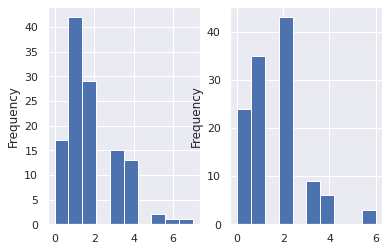

In [48]:
# プロットエリアを2つに分け、Urawaに関して「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
# なお、ヒストグラムの表示には Matplotlib の hist を使い、figureで2つのグラフを「並べて」表示すること。
# ※ histの詳細： https://matplotlib.org/2.2.2/api/_as_gen/matplotlib.pyplot.hist.html

#現状Query下だけなので複数の列が存在しておりその複数列がヒストグラム化されているように見えますね。
#クエリしたあとに列を指定するといいですよ。

#fig,axのfigは描画エリア全体のオブジェクト figureの略　mentor-otaさんのイラストを思い出せ
#axが分割された描画エリアのオブジェクトのリストが返ってきています fig,axは戻り値　である。

y1 = data.query("Home == 'Urawa'")['Home_Goals']
y2 = data.query("Away == 'Urawa'")['Away_Goals']
#fig = plt.figure()　　不必要だった
#ax = fig.add_subplot(1,2,2)不必要だった #描画キャンパスを何行に分割するのかを1番目の引数で指定し何列に分割するのかを2番目の引数で指定する3番目の引数にこれからグラフを描くのに利用するサブ領域の番号を入れる。
fig, ax = plt.subplots(1,2)
y1.plot.hist(ax=ax[0],stacked=False)   #ax=ax[0]←この作業はリストである。列を抽出している。
y2.plot.hist(ax=ax[1],stacked=False)

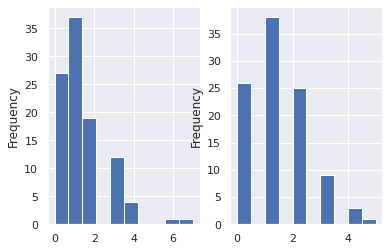

In [49]:
# もう1つ、どこか違うチームをピックアップして、同様に
# 「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
yy1 = data.query("Home == 'Kobe'")['Home_Goals']
yy2 = data.query("Away == 'Kobe'")['Away_Goals']
fig, ax = plt.subplots(1,2)
yy1.plot.hist(ax=ax[0],stacked=False)   #ax=ax[0]←この作業はリストである。列を抽出している。
yy2.plot.hist(ax=ax[1],stacked=False)

## 4. モデルの作成

ここでは、応答変数をHome_Goalsとして、2通りのモデルを作成し、AICを確認してみましょう。

In [50]:
# 説明変数：Away_Goals、HomeとAwayを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_1 = smf.glm('Home_Goals ~ Away_Goals+Home+Away', data=data, family=sm.families.Poisson()).fit()
print('Model-1:',model_1.aic.round(3))


Model-1: 6448.858


In [51]:
# 説明変数：HomeとAway_Goalsを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_2 = smf.glm('Home_Goals ~ Away_Goals+Home', data=data, family=sm.families.Poisson()).fit()
print('Model-2:',model_2.aic.round(3))


Model-2: 6472.639


In [52]:
# 上記2つのモデルを比較し、選択すべき最適なモデルについて詳細を表示
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Home_Goals   No. Observations:                 2140
Model:                            GLM   Df Residuals:                     2087
Model Family:                 Poisson   Df Model:                           52
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.4
Date:                Thu, 23 Dec 2021   Deviance:                       2433.7
Time:                        10:21:20   Pearson chi2:                 2.13e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0668      0.132     -0.505      0.614      -0.326       0.193
Home[T.Avispa Fukuoka]       -0.0592      0.269     -0.220      0.826      -0.587       0.469
Home[T.C-Osaka]               0.4320      0.133      3.252      0.001       0.172       0.692
Home[T.FC Tokyo]              0.4069      0.125      3.256      0.001       0.162       0.652
Home[T.G-Osaka]               0.5258      0.126      4.182      0.000       0.279       0.772
Home[T.Hiroshima]             0.4595      0.124      3.716      0.000       0.217       0.702
Home[T.Iwata]                 0.3488      0.135      2.579      0.010       0.084       0.614
Home[T.Kashima]               0.4952      0.123      4.020      0.000       0.254       0.737
Home[T.Kashiwa]               0.4445      0.124      3.581      0.000       0.201       0.688
Home[T.Kawasaki Frontale]     0.7168      0.119      6.041      0.000       0.484       0.949
Home[T.Kobe]                  0.3414      0.131      2.611      0.009       0.085       0.598
Home[T.Kofu]                 -0.1905      0.156     -1.218      0.223      -0.497       0.116
Home[T.Montedio Yamagata]    -0.1853      0.286     -0.649      0.517      -0.745       0.375
Home[T.Nagoya]                0.3949      0.129      3.055      0.002       0.142       0.648
Home[T.Oita]                 -0.1822      0.286     -0.638      0.523      -0.742       0.377
Home[T.Omiya Ardija]          0.1612      0.142      1.138      0.255      -0.116       0.439
Home[T.Sagan Tosu]            0.2572      0.129      1.994      0.046       0.004       0.510
Home[T.Sapporo]               0.2288      0.162      1.408      0.159      -0.090       0.547
Home[T.Shimizu]               0.2962      0.131      2.257      0.024       0.039       0.554
Home[T.Shonan]               -0.0340      0.159     -0.213      0.831      -0.346       0.278
Home[T.Tokushima]            -1.2166      0.458     -2.654      0.008      -2.115      -0.318
Home[T.Urawa]                 0.6208      0.120      5.155      0.000       0.385       0.857
Home[T.V-Varen Nagasaki]      0.1154      0.256      0.450      0.652      -0.387       0.617
Home[T.Vegalta Sendai]        0.4373      0.124      3.526      0.000       0.194       0.680
Home[T.Yamaga]                0.1723      0.245      0.702      0.482      -0.308       0.653
Home[T.Yokohama M.]           0.3622      0.126      2.875      0.004       0.115       0.609
Away[T.Avispa Fukuoka]        0.3390      0.193      1.755      0.079      -0.040       0.718
Away[T.C-Osaka]              -0.0896      0.127     -0.707      0.480      -0.338       0.159
Away[T.FC Tokyo]             -0.1706      0.119     -1.437      0.151      -0.403       0.062
Away[T.G-Osaka]              -0.0014      0.117     -0.012      0.991      

In [53]:
# Home: Urawa, Away: KashimaでAwayのチームが0得点だった場合のHomeの得点を予測
# なお、予測した得点は変数 pred1 に格納し、pred1の得点だけ（ pred1[0] ）を表示すること。

predx=pd.DataFrame({"Home":"Urawa","Away":"Kashima","Away_Goals":0},index=[0])
pred1=model_1.predict(predx)
pred1
#DataFrame()には、{“データフレームの列名”:データ}となるような辞書を渡します


0    1.575325
dtype: float64

In [54]:
# Home: Urawa, Away: KashimaでAwayのチームが2得点だった場合のHomeの得点を予測
# なお、予測した得点は変数 pred2 に格納し、pred2の得点だけ（ pred2[0] ）を表示すること。
predy=pd.DataFrame({"Home":"Urawa","Away":"Kashima","Away_Goals":2},index=[0])
pred2=model_1.predict(predy)
pred2


0    1.730129
dtype: float64

## 5. シミュレーション

ここまでの内容で、Homeの点数を予測するモデルが作成できました。
しかし、このままでは「複数回の試合を行った際に、どのチームの勝率が高くなるか」を明言できません。


そのため、作成したモデルを用い、複数回の試合をシミュレーションし、勝率を計算してみましょう。
なお、今回は引き続き HomeがUrawa、KashimaがAwayの場合を想定します。

　
Awayの得点は、Awayの得点の平均をlambda（λ：強度）とするポアソン分布に従うことがわかっています。
そのため、ポアソン分布から乱数を発生させ、その結果からHomeの得点を予測してみましょう。

In [55]:
# 今回はKashimaがAwayですので、Kashimaの　Awayでの得点平均を計算
# 上記で求めた平均=lambda(強度：λ)としたポアソン分布から乱数を100個発生させる。np.random.poisson()を使うこと。
# 参考：https://techacademy.jp/my/datascience/data-science3/simulation#chapter-5
mu_kashiwa=np.mean(data.query('Away=="Kashiwa"')['Away_Goals'])

np.random.seed(1)
rvs_poisson = np.random.poisson(lam=mu_kashiwa, size=100)
rvs_poisson


array([2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 3, 0, 0, 1, 2, 1, 2, 3, 1, 2,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 3, 0, 2, 2, 4, 1, 3, 0, 3, 0, 2, 1,
       2, 2, 3, 0, 2, 4, 0, 0, 0, 1, 3, 1, 2, 1, 3, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 1, 0, 3, 3, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 3, 0, 4, 0,
       5, 1, 4, 1, 0, 0, 1, 2, 0, 1, 3, 4])

In [75]:
# Home: Urawa, Away: KashimaでAwayのチームが 乱数発生させた得点だった場合のHomeの得点を予測
# （予測には、4. モデルの作成 で選択した最適なモデルを使用）
# なお、今回はAway: Kashimaの得点（乱数）が100個あるため、forなどの繰り返しにより 100回の予測を行うこと。

#いえrangeを取る必要はありません
#for i in rvs_poisson:
#とすることでrvs_poissonの要素を一つずつとりだすというコードになるのでこのようにしましょう

result = []
for i in rvs_poisson:
    predy=pd.DataFrame({"Home":"Urawa","Away":"Kashima","Away_Goals":i},index=[0])
    home[0]=model_1.predict(predy)
    result.append(home[0])
    #home=model_1.predict(predy)　こっちよりもhomeに[0]をつけるべし
    #result.append(home)
    #変数homeの中身が長さ1のSeries型(わかりやすく言うとリストで[予測結果]みたいな感じで[]がついている)なのでhome[0]を追加せよ

In [91]:
# 予測したHomeの得点を使用し、Home: Urawa, Away: Kashimaにおける Urawaの勝率を表示
# （Homeのチームの得点が上回っているデータの個数を計算することで「Homeのチームが勝つ確率」を算出）

#勝つ確率を出すわけですから、まずホームの得点であるresultとアウェーの得点であるrvs_poissonを比較演算子を使って比較するといいですよ
#それができたら一つ一つの比較でどちらが買った加藤情報が得られるので
#あとはそのデータ全体の勝率を出すと考えましょう

home_team_win_rate=result > rvs_poisson
rate_win=sum(home_team_win_rate)
rate_win
#print(f"Urawaの勝率は"+{rate_win}+"%です！")

60